In [7]:
df1=pd.read_csv(r"C:\Users\rahul\OneDrive\Desktop\data singapore\ResaleFlatPricesBasedonApprovalDate19901999.csv")
df2=pd.read_csv(r"C:\Users\rahul\OneDrive\Desktop\data singapore\ResaleFlatPricesBasedonApprovalDate2000Feb2012.csv")
df3=pd.read_csv(r"C:\Users\rahul\OneDrive\Desktop\data singapore\ResaleFlatPricesBasedonRegistrationDateFromJan2015toDec2016.csv")
df4=pd.read_csv(r"C:\Users\rahul\OneDrive\Desktop\data singapore\ResaleflatpricesbasedonregistrationdatefromJan2017onwards.csv")
df5=pd.read_csv(r"C:\Users\rahul\OneDrive\Desktop\data singapore\ResaleFlatPricesBasedonRegistrationDateFromMar2012toDec2014.csv")

df=pd.concat([df1,df2,df3,df4,df5], ignore_index=True)
df

,month,town,flat_type,block,street_name,storey_range,floor_area_sqm,flat_model,lease_commence_date,resale_price,remaining_lease
0,1990-01,ANG MO KIO,1 ROOM,309,ANG MO KIO AVE 1,10 TO 12,31.0,IMPROVED,1977,9000.0,NaN
1,1990-01,ANG MO KIO,1 ROOM,309,ANG MO KIO AVE 1,04 TO 06,31.0,IMPROVED,1977,6000.0,NaN
2,1990-01,ANG MO KIO,1 ROOM,309,ANG MO KIO AVE 1,10 TO 12,31.0,IMPROVED,1977,8000.0,NaN
3,1990-01,ANG MO KIO,1 ROOM,309,ANG MO KIO AVE 1,07 TO 09,31.0,IMPROVED,1977,6000.0,NaN
4,1990-01,ANG MO KIO,3 ROOM,216,ANG MO KIO AVE 1,04 TO 06,73.0,NEW GENERATION,1976,47200.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...
933418,2014-12,YISHUN,5 ROOM,816,YISHUN ST 81,10 TO 12,122.0,Improved,1988,580000.0,NaN
933419,2014-12,YISHUN,EXECUTIVE,325,YISHUN CTRL,10 TO 12,146.0,Maisonette,1988,540000.0,NaN
933420,2014-12,YISHUN,EXECUTIVE,618,YISHUN RING RD,07 TO 09,164.0,Apartment,1992,738000.0,NaN
933421,2014-12,YISHUN,EXECUTIVE,277,YISHUN ST 22,07 TO 09,152.0,Maisonette,1985,592000.0,NaN


In [8]:
df.shape

(933423, 11)

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 933423 entries, 0 to 933422
Data columns (total 11 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   month                933423 non-null  object 
 1   town                 933423 non-null  object 
 2   flat_type            933423 non-null  object 
 3   block                933423 non-null  object 
 4   street_name          933423 non-null  object 
 5   storey_range         933423 non-null  object 
 6   floor_area_sqm       933423 non-null  float64
 7   flat_model           933423 non-null  object 
 8   lease_commence_date  933423 non-null  int64  
 9   resale_price         933423 non-null  float64
 10  remaining_lease      224373 non-null  object 
dtypes: float64(2), int64(1), object(8)
memory usage: 78.3+ MB


In [11]:
df.columns

Index(['month', 'town', 'flat_type', 'block', 'street_name', 'storey_range',
       'floor_area_sqm', 'flat_model', 'lease_commence_date', 'resale_price',
       'remaining_lease'],
      dtype='object')

In [12]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
floor_area_sqm,933423.0,95.686490,25.814796,28.0,73.0,93.0,113.0,366.7
lease_commence_date,933423.0,1988.342442,10.730136,1966.0,1981.0,1986.0,1996.0,2020.0
resale_price,933423.0,322739.073861,172293.360829,5000.0,194500.0,299000.0,420000.0,1588000.0


In [13]:
df['resale_price'].value_counts()

resale_price
300000.0    6936
350000.0    6877
280000.0    6554
320000.0    6540
380000.0    6336
            ... 
466600.0       1
746600.0       1
823088.0       1
599889.0       1
320388.0       1
Name: count, Length: 9608, dtype: int64

DATA CLEANING

In [14]:
df.nunique()

month                   416
town                     27
flat_type                 8
block                  2712
street_name             584
storey_range             25
floor_area_sqm          213
flat_model               34
lease_commence_date      55
resale_price           9608
remaining_lease         727
dtype: int64

In [15]:
df.isna().sum()

month                       0
town                        0
flat_type                   0
block                       0
street_name                 0
storey_range                0
floor_area_sqm              0
flat_model                  0
lease_commence_date         0
resale_price                0
remaining_lease        709050
dtype: int64

REMAINING_LEASE

In [16]:
def convert_to_years(row):
    if pd.notna(row) and isinstance(row, str):
        if 'years' in row:
            parts = row.split()
            years = float(parts[0])
            months = float(parts[2]) if len(parts) > 2 else 0
            return years + months / 12
    return row

In [17]:
df['remaining_lease'] =df['remaining_lease'].apply(convert_to_years)

In [18]:
# fill null values in remaining_lease with mode beacuse null value more than 25% it will remove affected in accuracy
df['remaining_lease']=df['remaining_lease'].fillna(df['remaining_lease'].mode()[0])
df.tail()

,month,town,flat_type,block,street_name,storey_range,floor_area_sqm,flat_model,lease_commence_date,resale_price,remaining_lease
933418,2014-12,YISHUN,5 ROOM,816,YISHUN ST 81,10 TO 12,122.0,Improved,1988,580000.0,68.0
933419,2014-12,YISHUN,EXECUTIVE,325,YISHUN CTRL,10 TO 12,146.0,Maisonette,1988,540000.0,68.0
933420,2014-12,YISHUN,EXECUTIVE,618,YISHUN RING RD,07 TO 09,164.0,Apartment,1992,738000.0,68.0
933421,2014-12,YISHUN,EXECUTIVE,277,YISHUN ST 22,07 TO 09,152.0,Maisonette,1985,592000.0,68.0
933422,2014-12,YISHUN,EXECUTIVE,277,YISHUN ST 22,04 TO 06,146.0,Maisonette,1985,545000.0,68.0


In [19]:
df['remaining_lease'].value_counts()

remaining_lease
68.000000    711667
95.000000      2420
67.000000      2214
69.000000      1915
71.000000      1773
              ...  
97.250000         1
97.583333         1
97.750000         1
96.833333         1
97.083333         1
Name: count, Length: 674, dtype: int64

In [20]:
df.isnull().sum()

month                  0
town                   0
flat_type              0
block                  0
street_name            0
storey_range           0
floor_area_sqm         0
flat_model             0
lease_commence_date    0
resale_price           0
remaining_lease        0
dtype: int64

Wrong Formate

In [21]:
df.dtypes

month                   object
town                    object
flat_type               object
block                   object
street_name             object
storey_range            object
floor_area_sqm         float64
flat_model              object
lease_commence_date      int64
resale_price           float64
remaining_lease        float64
dtype: object

In [22]:
df[['resale_year', 'resale_month']] =df['month'].str.split('-', expand=True)

# drop the resale month column
df.drop('month', axis = 1, inplace= True)

df.head(2)

,town,flat_type,block,street_name,storey_range,floor_area_sqm,flat_model,lease_commence_date,resale_price,remaining_lease,resale_year,resale_month
0,ANG MO KIO,1 ROOM,309,ANG MO KIO AVE 1,10 TO 12,31.0,IMPROVED,1977,9000.0,68.0,1990,01
1,ANG MO KIO,1 ROOM,309,ANG MO KIO AVE 1,04 TO 06,31.0,IMPROVED,1977,6000.0,68.0,1990,01


In [23]:
# Split the 'Range' column into lower and upper bounds
df[['storey_lower_bound', 'storey_upper_bound']] = df['storey_range'].str.split(' TO ', expand=True)

# Convert the lower and upper bounds to numeric values
df['storey_lower_bound'] = pd.to_numeric(df['storey_lower_bound'])
df['storey_upper_bound'] = pd.to_numeric(df['storey_upper_bound'])

df.tail(2)

,town,flat_type,block,street_name,storey_range,floor_area_sqm,flat_model,lease_commence_date,resale_price,remaining_lease,resale_year,resale_month,storey_lower_bound,storey_upper_bound
933421,YISHUN,EXECUTIVE,277,YISHUN ST 22,07 TO 09,152.0,Maisonette,1985,592000.0,68.0,2014,12,7,9
933422,YISHUN,EXECUTIVE,277,YISHUN ST 22,04 TO 06,146.0,Maisonette,1985,545000.0,68.0,2014,12,4,6


In [24]:
df.drop('storey_range', axis = 1, inplace= True)

In [25]:
# CONVERTING

df['block'] = pd.to_numeric(df['block'], errors='coerce')
df['resale_year'] = pd.to_numeric(df['resale_year'], errors='coerce')
df['resale_month'] = pd.to_numeric(df['resale_month'], errors='coerce')
df['block'] = df['block'].fillna(df['block'].mode()[0])

In [26]:
df.head()

,town,flat_type,block,street_name,floor_area_sqm,flat_model,lease_commence_date,resale_price,remaining_lease,resale_year,resale_month,storey_lower_bound,storey_upper_bound
0,ANG MO KIO,1 ROOM,309.0,ANG MO KIO AVE 1,31.0,IMPROVED,1977,9000.0,68.0,1990,1,10,12
1,ANG MO KIO,1 ROOM,309.0,ANG MO KIO AVE 1,31.0,IMPROVED,1977,6000.0,68.0,1990,1,4,6
2,ANG MO KIO,1 ROOM,309.0,ANG MO KIO AVE 1,31.0,IMPROVED,1977,8000.0,68.0,1990,1,10,12
3,ANG MO KIO,1 ROOM,309.0,ANG MO KIO AVE 1,31.0,IMPROVED,1977,6000.0,68.0,1990,1,7,9
4,ANG MO KIO,3 ROOM,216.0,ANG MO KIO AVE 1,73.0,NEW GENERATION,1976,47200.0,68.0,1990,1,4,6


In [27]:
df.dtypes

town                    object
flat_type               object
block                  float64
street_name             object
floor_area_sqm         float64
flat_model              object
lease_commence_date      int64
resale_price           float64
remaining_lease        float64
resale_year              int64
resale_month             int64
storey_lower_bound       int64
storey_upper_bound       int64
dtype: object

TEXT ERRORS

In [28]:
object_data_cols = [var for var in df.columns if df[var].dtype == 'object']
object_data_cols

['town', 'flat_type', 'street_name', 'flat_model']

In [29]:
df['town'].value_counts()

town
TAMPINES           80399
YISHUN             70470
JURONG WEST        67106
BEDOK              66974
WOODLANDS          65980
ANG MO KIO         52350
HOUGANG            51073
BUKIT BATOK        44828
CHOA CHU KANG      38616
BUKIT MERAH        34595
PASIR RIS          33370
SENGKANG           32953
TOA PAYOH          31731
QUEENSTOWN         28934
GEYLANG            28346
CLEMENTI           28169
BUKIT PANJANG      27878
KALLANG/WHAMPOA    27413
JURONG EAST        24909
SERANGOON          22933
BISHAN             21364
PUNGGOL            21126
SEMBAWANG          14051
MARINE PARADE       8068
CENTRAL AREA        7192
BUKIT TIMAH         2531
LIM CHU KANG          64
Name: count, dtype: int64

In [30]:
df['flat_type'].value_counts()

flat_type
4 ROOM              355068
3 ROOM              297515
5 ROOM              196904
EXECUTIVE            70059
2 ROOM               12028
1 ROOM                1305
MULTI GENERATION       279
MULTI-GENERATION       265
Name: count, dtype: int64

In [31]:
# Replace 'MULTI-GENERATION' with 'MULTI GENERATION' in the specified column to avoid duplicate
df['flat_type'] = df['flat_type'].str.replace('MULTI-GENERATION', 'MULTI GENERATION')

In [32]:
df['flat_type'].value_counts()

flat_type
4 ROOM              355068
3 ROOM              297515
5 ROOM              196904
EXECUTIVE            70059
2 ROOM               12028
1 ROOM                1305
MULTI GENERATION       544
Name: count, dtype: int64

In [33]:
df['street_name'].value_counts()

street_name
YISHUN RING RD        17674
BEDOK RESERVOIR RD    14792
ANG MO KIO AVE 10     13867
ANG MO KIO AVE 3      12206
HOUGANG AVE 8          9400
                      ...  
GEYLANG EAST AVE 2       15
SEMBAWANG WAY            15
OUTRAM HILL               9
MARINE PARADE CTRL        3
ALJUNIED AVE 2            1
Name: count, Length: 584, dtype: int64

In [34]:
df['flat_model'].value_counts()

flat_model
Model A                   197240
Improved                  169700
New Generation            110837
NEW GENERATION             78898
IMPROVED                   73589
MODEL A                    70381
Premium Apartment          47436
Simplified                 34532
Apartment                  25787
Standard                   25314
SIMPLIFIED                 23258
Maisonette                 17599
STANDARD                   17375
MAISONETTE                 12215
Model A2                   10211
APARTMENT                   9901
DBSS                        3370
Adjoined flat               1262
Model A-Maisonette          1104
MODEL A-MAISONETTE           982
Terrace                      449
Type S1                      443
MULTI GENERATION             279
Multi Generation             265
TERRACE                      247
Type S2                      219
2-room                       138
Premium Apartment Loft       113
Premium Maisonette            86
Improved-Maisonette           83

In [35]:
df['flat_model'] = df['flat_model'].replace({'MODEL A':'Model A','NEW GENERATION':'New Generation',
                                             'IMPROVED':'Improved','PREMIUM APARTMENT':'Premium Apartment',
                                             'MULTI GENERATION':'Multi Generation ','2-ROOM':'2-room',
                                            'SIMPLIFIED':'Simplified','STANDARD':'Standard',
                                             'MAISONETTE':'Maisonette','MULTI GENERATION':'Multi Generation',
                                             'APARTMENT':'Apartment','MODEL A-MAISONETTE':'Model A-Maisonette',
                                             'TERRACE':'Terrace','IMPROVED-MAISONETTE':'Improved-Maisonette'})

In [36]:
df['flat_model'].value_counts()

flat_model
Model A                   267621
Improved                  243289
New Generation            189735
Simplified                 57790
Premium Apartment          47442
Standard                   42689
Apartment                  35688
Maisonette                 29814
Model A2                   10211
DBSS                        3370
Model A-Maisonette          2086
Adjoined flat               1262
Terrace                      696
Multi Generation             544
Type S1                      443
Type S2                      219
2-room                       159
Improved-Maisonette          127
Premium Apartment Loft       113
Premium Maisonette            86
3Gen                          39
Name: count, dtype: int64

Duplicates

In [37]:
df.duplicated().sum()

np.int64(2351)

In [38]:
df.drop_duplicates(inplace=True)
df.duplicated().sum()

np.int64(0)

Outliers

In [39]:
float_data_cols = [var for var in df.columns if df[var].dtype == 'float64']
float_data_cols

['block', 'floor_area_sqm', 'resale_price', 'remaining_lease']

In [40]:
integer_data_cols = [var for var in df.columns if df[var].dtype == 'int64']
integer_data_cols

['lease_commence_date',
 'resale_year',
 'resale_month',
 'storey_lower_bound',
 'storey_upper_bound']

Using Boxplot

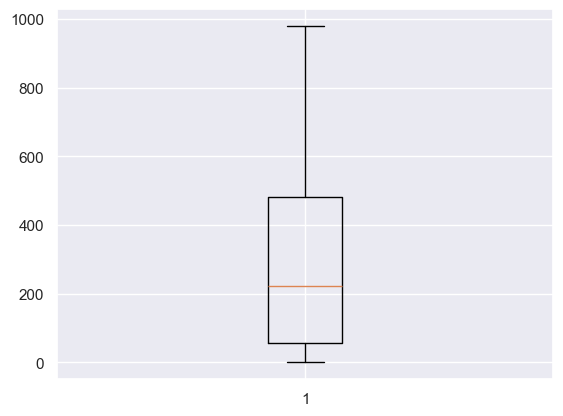

In [41]:
# Creating plot
plt.boxplot(df['block'] )

# show plot
plt.show()

In [42]:
        # IQR

Q1 = df['block'].quantile(0.25)
Q3 = df['block'].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

lower_bound , upper_bound

(np.float64(-587.0), np.float64(1125.0))

In [43]:
df.block = df.block.clip(lower_bound , upper_bound)

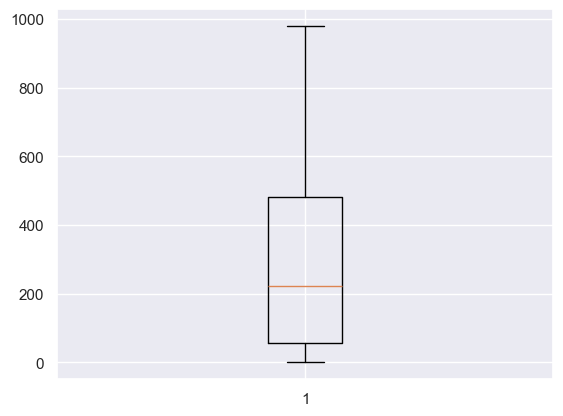

In [44]:
# Creating plot
plt.boxplot(df['block'] )

# show plot
plt.show()

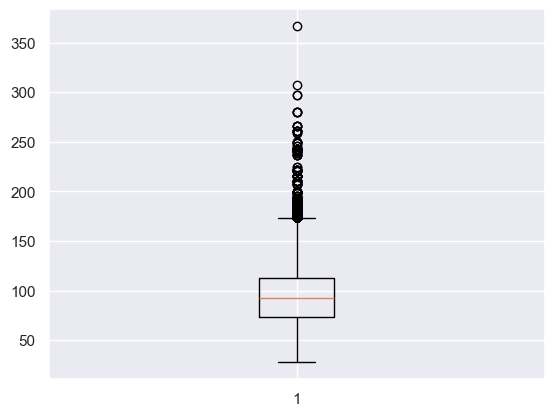

In [45]:
# Creating plot
plt.boxplot(df['floor_area_sqm'] )

# show plot
plt.show()

In [46]:
Q1 = df['floor_area_sqm'].quantile(0.25)
Q3 = df['floor_area_sqm'].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

lower_bound , upper_bound

(np.float64(13.0), np.float64(173.0))

In [47]:
df.floor_area_sqm = df.floor_area_sqm.clip(lower_bound , upper_bound)

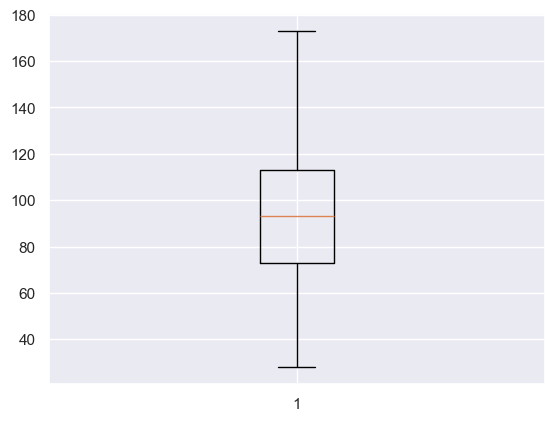

In [48]:
# Creating plot
plt.boxplot(df['floor_area_sqm'] )

# show plot
plt.show()

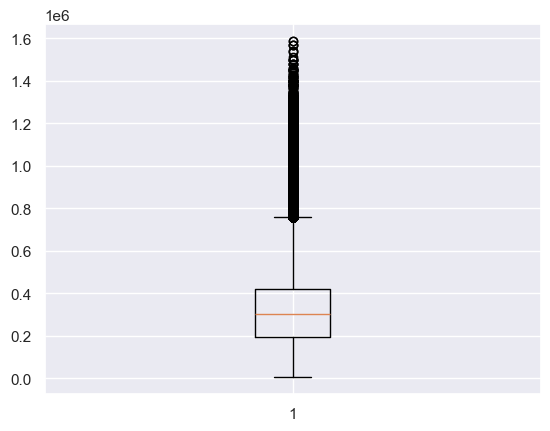

In [49]:
# Creating plot
plt.boxplot(df['resale_price'] )

# show plot
plt.show()

In [50]:
Q1 = df['resale_price'].quantile(0.25)
Q3 = df['resale_price'].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

lower_bound , upper_bound

(np.float64(-142500.0), np.float64(757500.0))

In [51]:
df.resale_price = df.resale_price.clip(lower_bound , upper_bound)

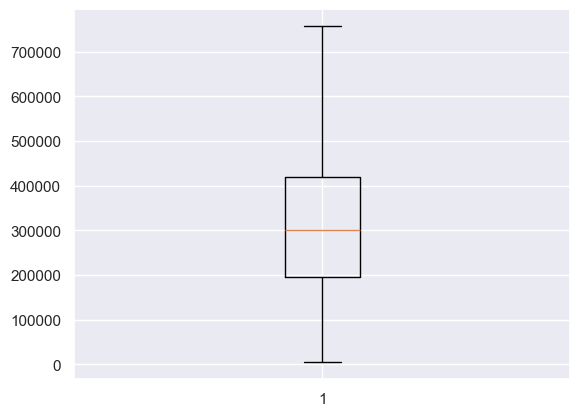

In [52]:
# Creating plot
plt.boxplot(df['resale_price'] )

# show plot
plt.show()

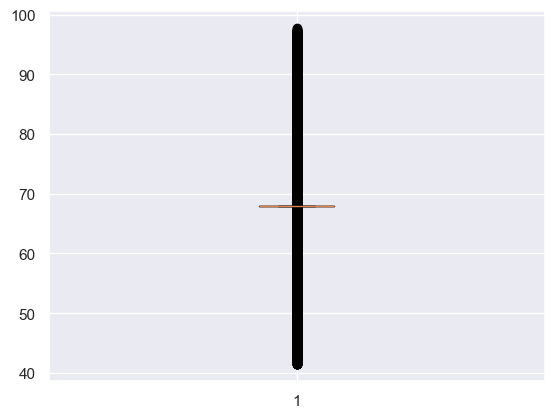

In [53]:
# Creating plot
plt.boxplot(df['remaining_lease'] )

# show plot
plt.show()

In [54]:
Q1 = df['remaining_lease'].quantile(0.25)
Q3 = df['remaining_lease'].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

lower_bound , upper_bound

(np.float64(68.0), np.float64(68.0))

In [55]:
df.remaining_lease = df.remaining_lease.clip(lower_bound , upper_bound)

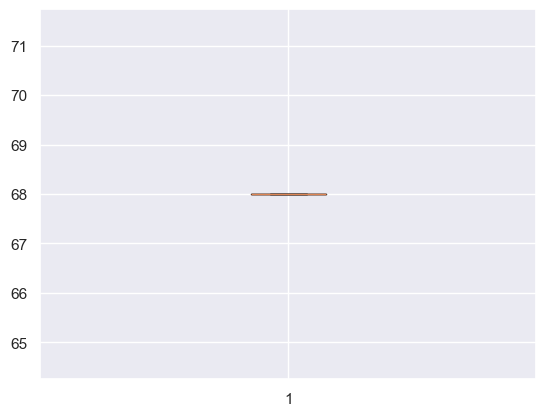

In [56]:
# Creating plot
plt.boxplot(df['remaining_lease'] )

# show plot
plt.show()

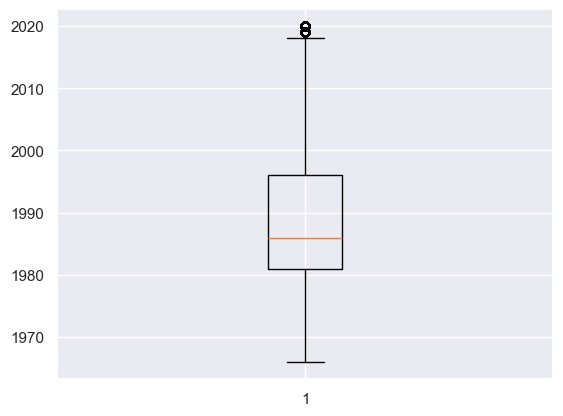

In [57]:
# Creating plot
plt.boxplot(df['lease_commence_date'] )

# show plot
plt.show()

In [58]:
Q1 = df['lease_commence_date'].quantile(0.25)
Q3 = df['lease_commence_date'].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

lower_bound , upper_bound

(np.float64(1958.5), np.float64(2018.5))

In [59]:
df.lease_commence_date = df.lease_commence_date.clip(lower_bound , upper_bound)

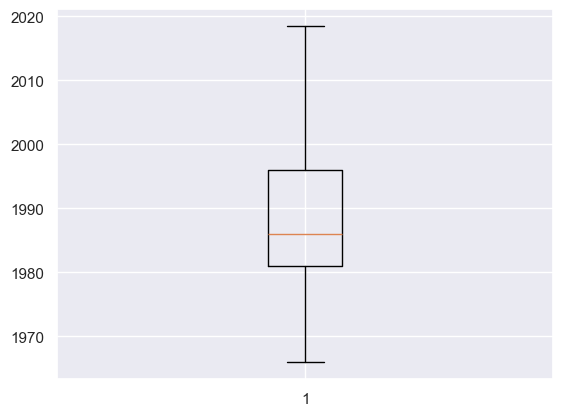

In [60]:
# Creating plot
plt.boxplot(df['lease_commence_date'] )

# show plot
plt.show()

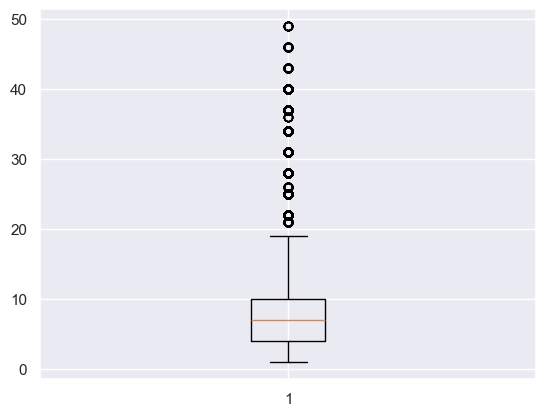

In [61]:
# Creating plot
plt.boxplot(df['storey_lower_bound'] )

# show plot
plt.show()

In [62]:
Q1 = df['storey_lower_bound'].quantile(0.25)
Q3 = df['storey_lower_bound'].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

lower_bound , upper_bound

(np.float64(-5.0), np.float64(19.0))

In [63]:
df.storey_lower_bound = df.storey_lower_bound.clip(lower_bound , upper_bound)

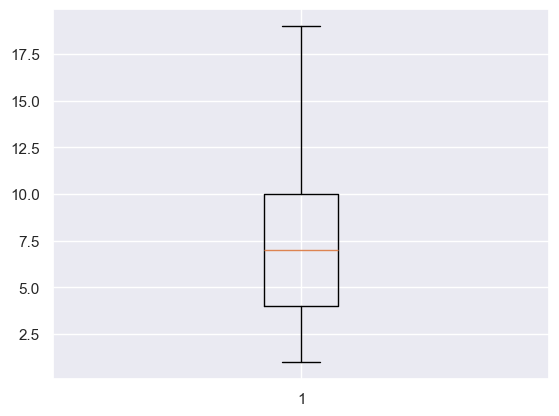

In [64]:
# Creating plot
plt.boxplot(df['storey_lower_bound'] )

# show plot
plt.show()

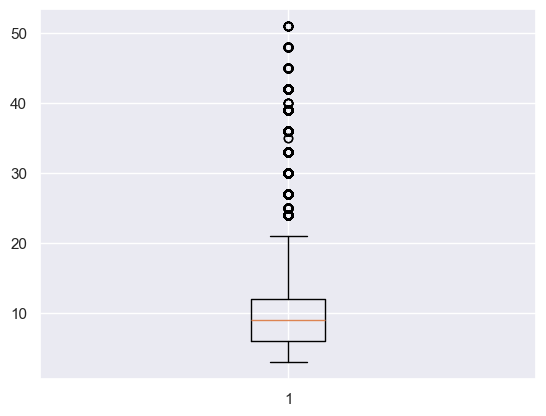

In [65]:
# Creating plot
plt.boxplot(df['storey_upper_bound'] )

# show plot
plt.show()

In [66]:
Q1 = df['storey_upper_bound'].quantile(0.25)
Q3 = df['storey_upper_bound'].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

lower_bound , upper_bound

(np.float64(-3.0), np.float64(21.0))

In [67]:
df.storey_upper_bound = df.storey_upper_bound.clip(lower_bound , upper_bound)

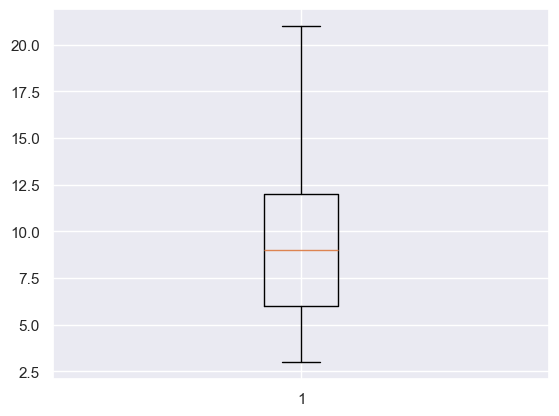

In [68]:
# Creating plot
plt.boxplot(df['storey_upper_bound'] )

# show plot
plt.show()

EDA - EXPLORATARY DATA ANALYSIS
Categorical Vs Frequency using BarPlot

In [69]:
object_data_cols = [var for var in df.columns if df[var].dtype == 'object']
object_data_cols

['town', 'flat_type', 'street_name', 'flat_model']

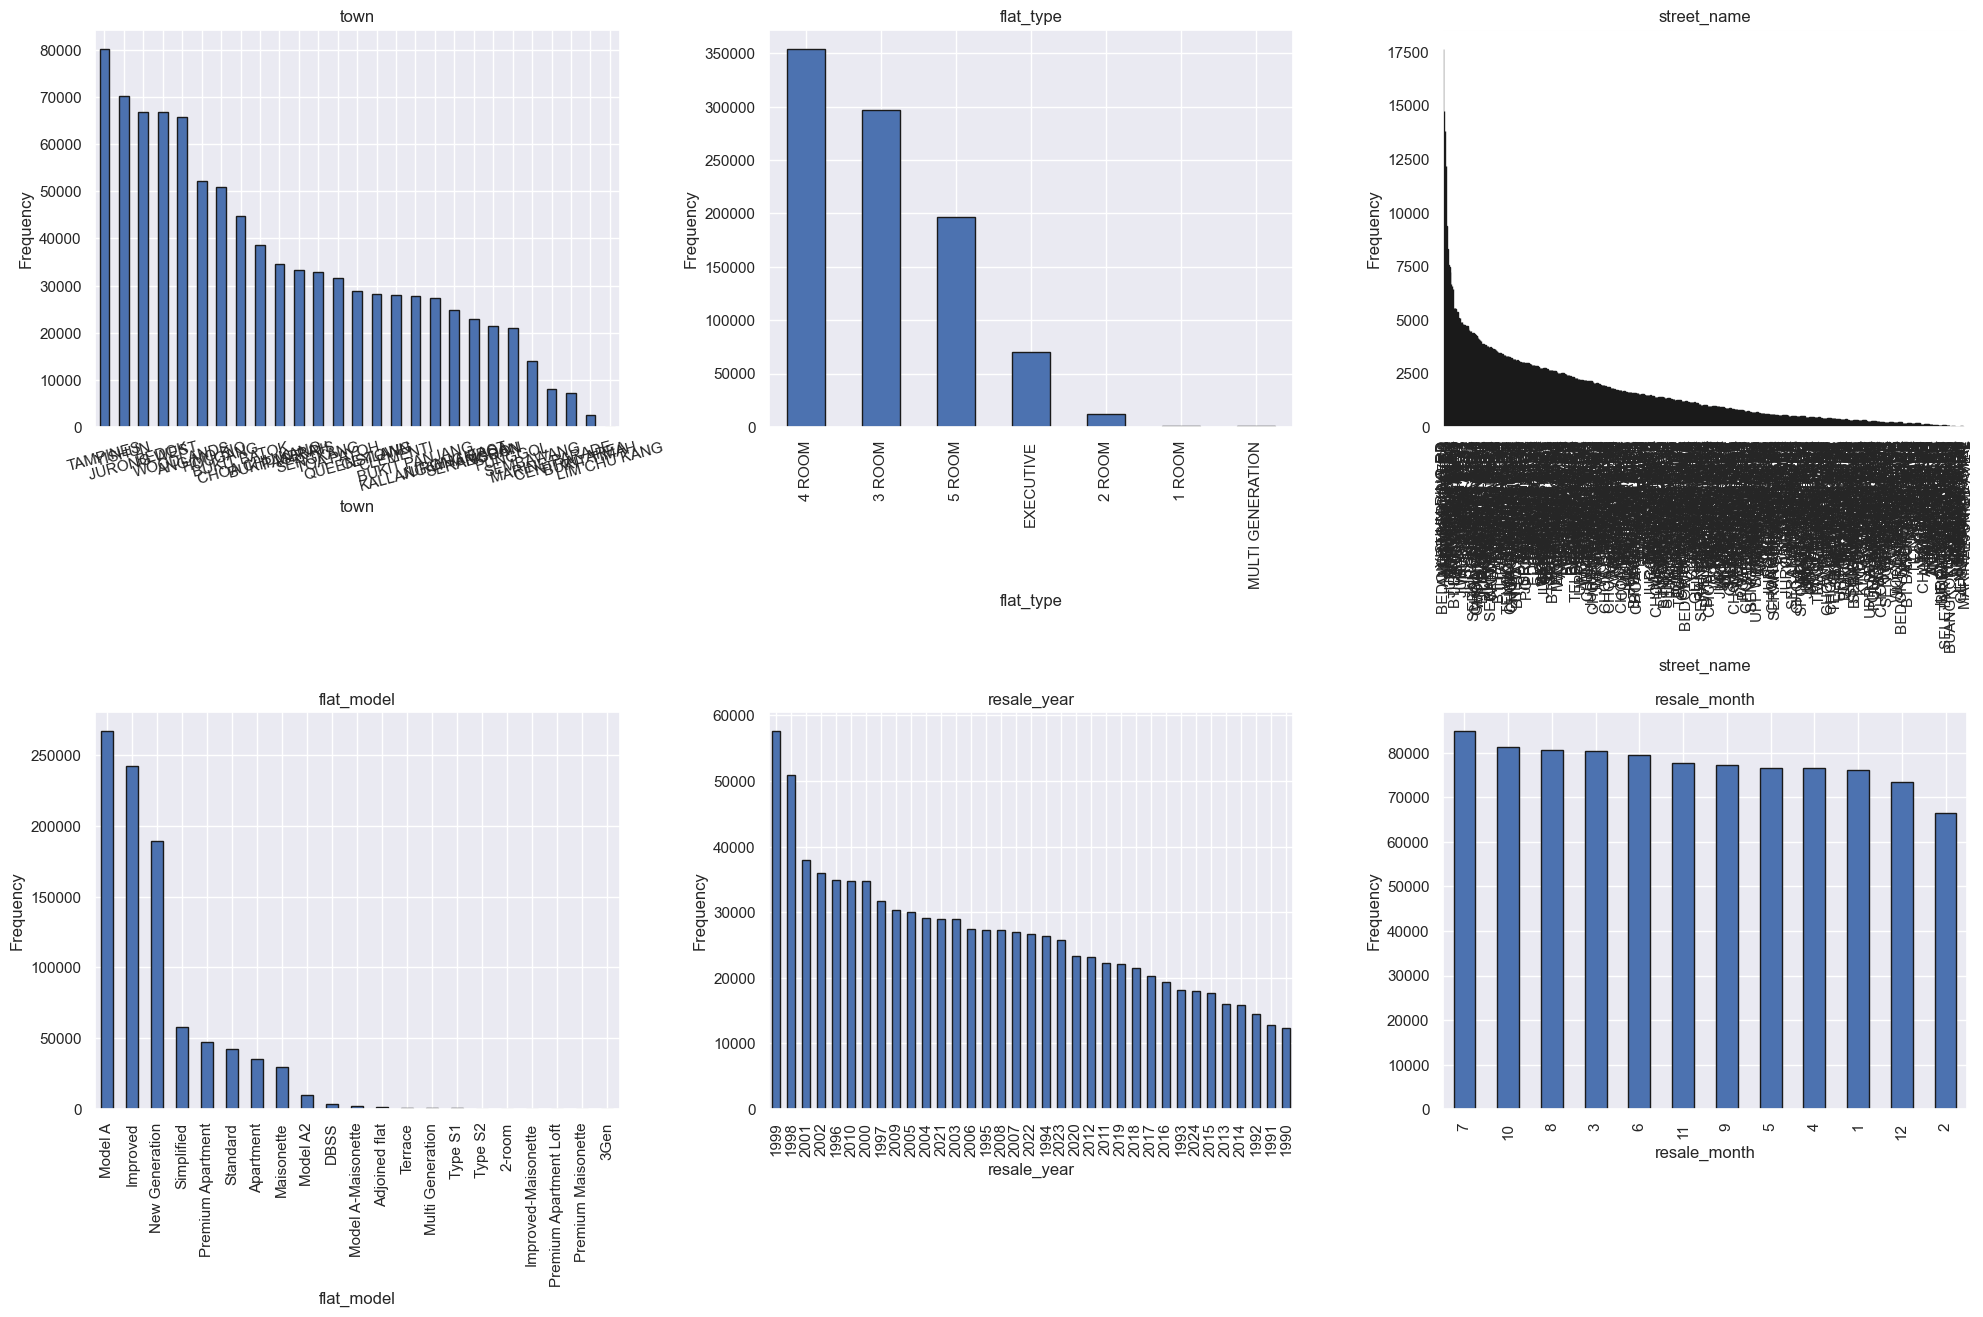

In [70]:
plt.figure(figsize=(20, 25))



plt.subplot(431)
df['town'].value_counts().sort_values(ascending=False).plot(kind='bar', edgecolor='k')
plt.title('town')
plt.xlabel('town')
plt.ylabel('Frequency')
plt.xticks(rotation=15)

plt.subplot(432)
df['flat_type'].value_counts().sort_values(ascending=False).plot(kind='bar', edgecolor='k')
plt.title('flat_type')
plt.xlabel('flat_type')
plt.ylabel('Frequency')

plt.subplot(433)
df['street_name'].value_counts().sort_values(ascending=False).plot(kind='bar', edgecolor='k')
plt.title('street_name')
plt.xlabel('street_name')
plt.ylabel('Frequency')

plt.subplot(434)
df['flat_model'].value_counts().sort_values(ascending=False).plot(kind='bar', edgecolor='k')
plt.title('flat_model')
plt.xlabel('flat_model')
plt.ylabel('Frequency')

plt.subplot(435)
df['resale_year'].value_counts().sort_values(ascending=False).plot(kind='bar', edgecolor='k')
plt.title('resale_year')
plt.xlabel('resale_year')
plt.ylabel('Frequency')

plt.subplot(436)
df['resale_month'].value_counts().sort_values(ascending=False).plot(kind='bar', edgecolor='k')
plt.title('resale_month')
plt.xlabel('resale_month')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

Feature Vs Target (Categorical Data )

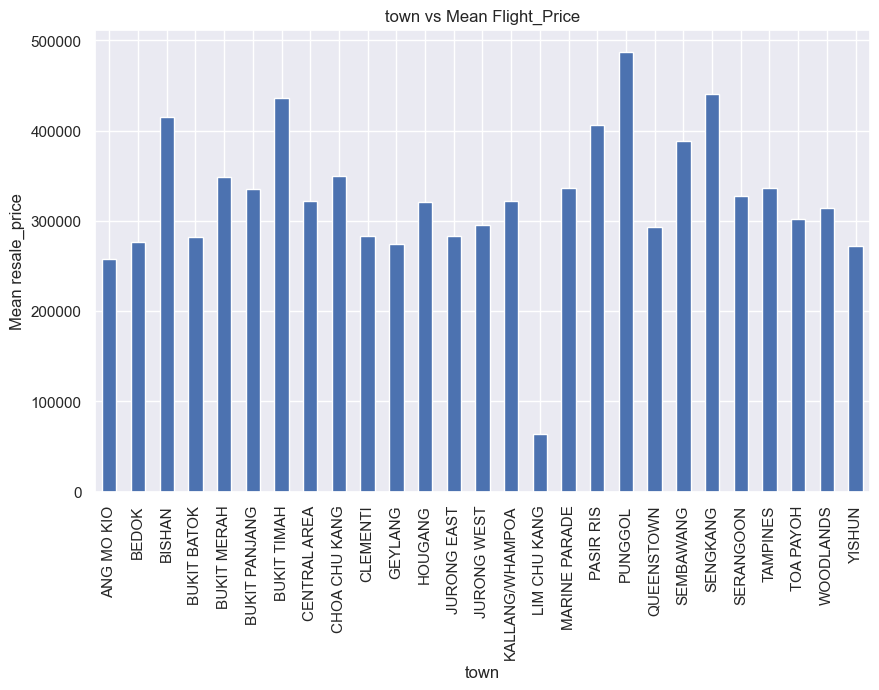

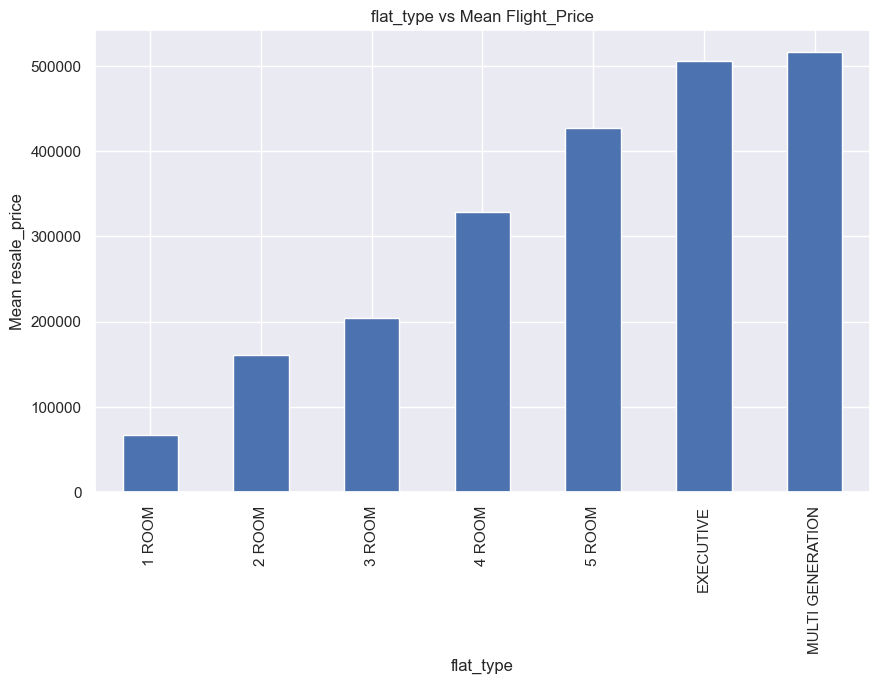

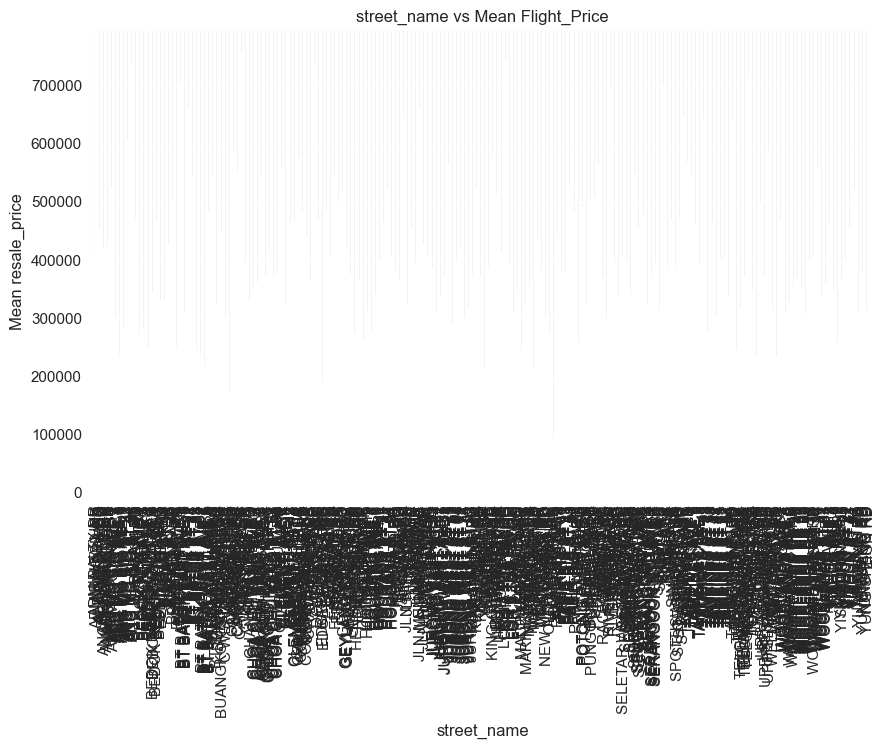

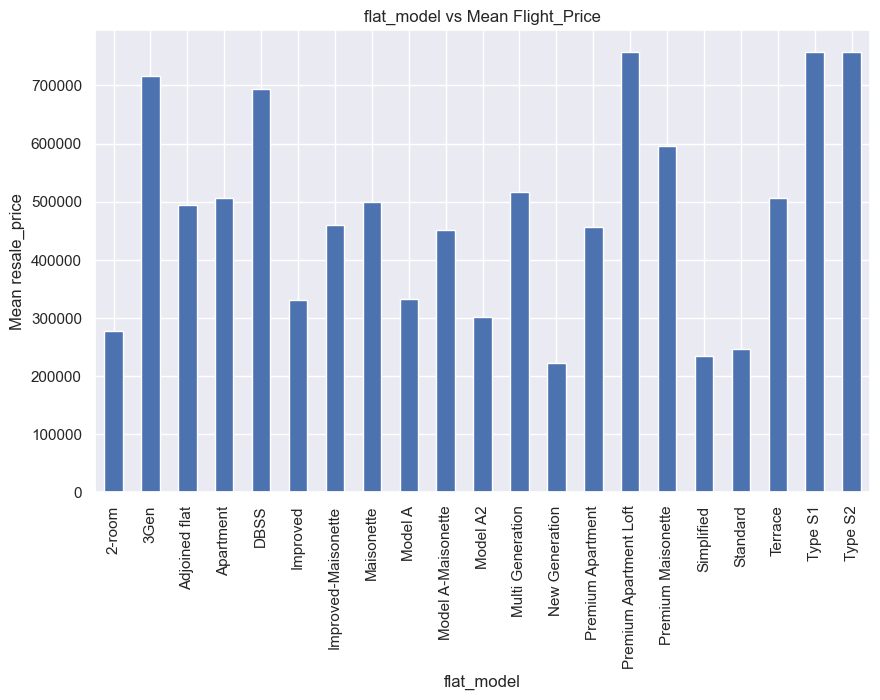

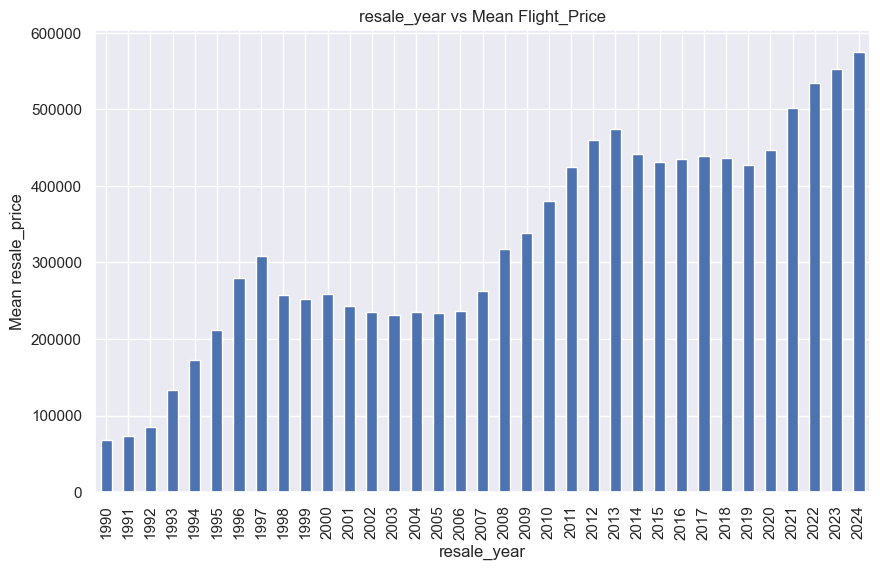

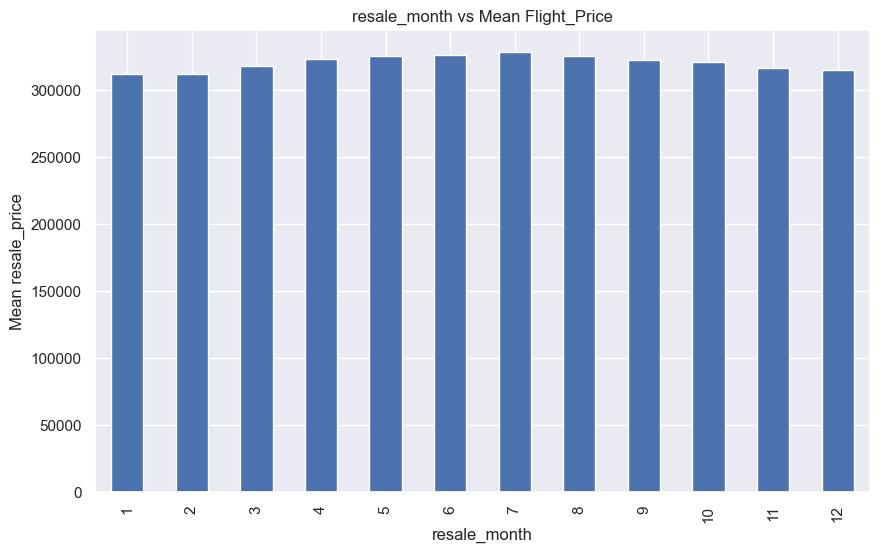

In [71]:
# List of features to plot
features = [
    'town',
 'flat_type',
 'street_name',
 'flat_model',
 'resale_year',
 'resale_month'
]
for feature in features:
    plt.figure(figsize=(10, 6))
    df.groupby(feature)['resale_price'].mean().plot(kind='bar')
    plt.xlabel(feature)
    plt.ylabel('Mean resale_price')
    plt.title(f'{feature} vs Mean Flight_Price')
    plt.show()

Feature Vs Target (Continues Data )

In [72]:
float_data_cols = [var for var in df.columns if df[var].dtype == 'float64']
float_data_cols

['block',
 'floor_area_sqm',
 'lease_commence_date',
 'resale_price',
 'remaining_lease']

In [73]:
integer_data_cols = [var for var in df.columns if df[var].dtype == 'int64']
integer_data_cols

['resale_year', 'resale_month', 'storey_lower_bound', 'storey_upper_bound']

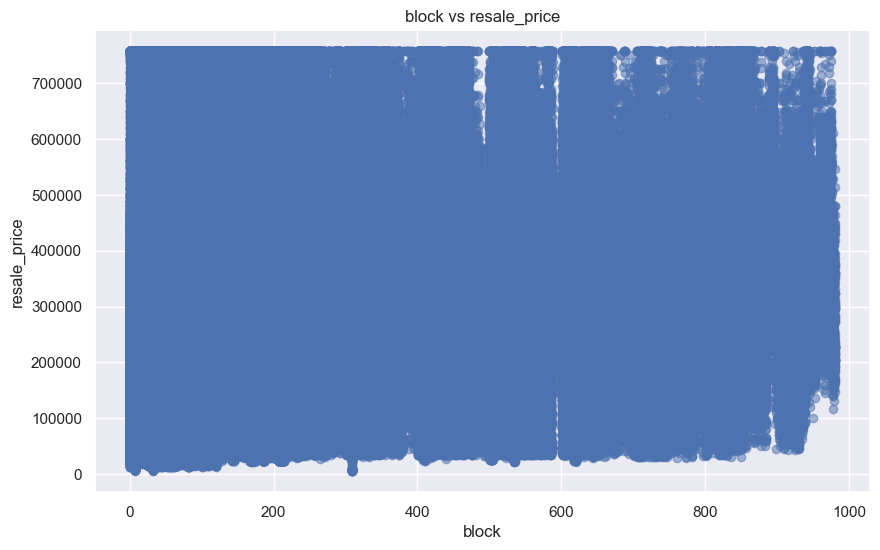

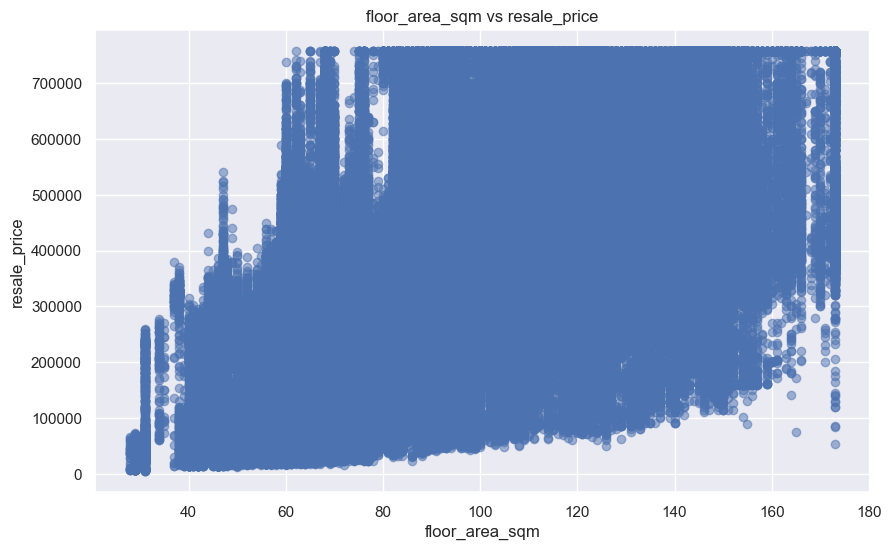

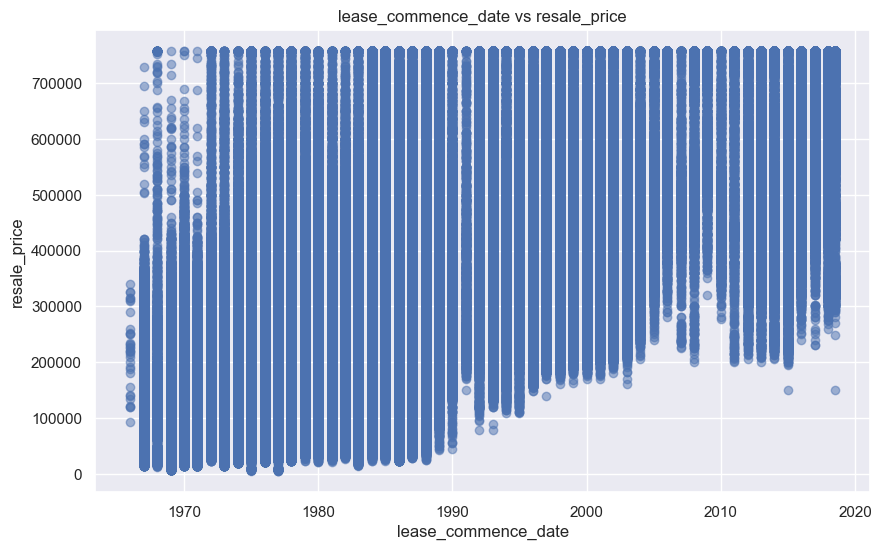

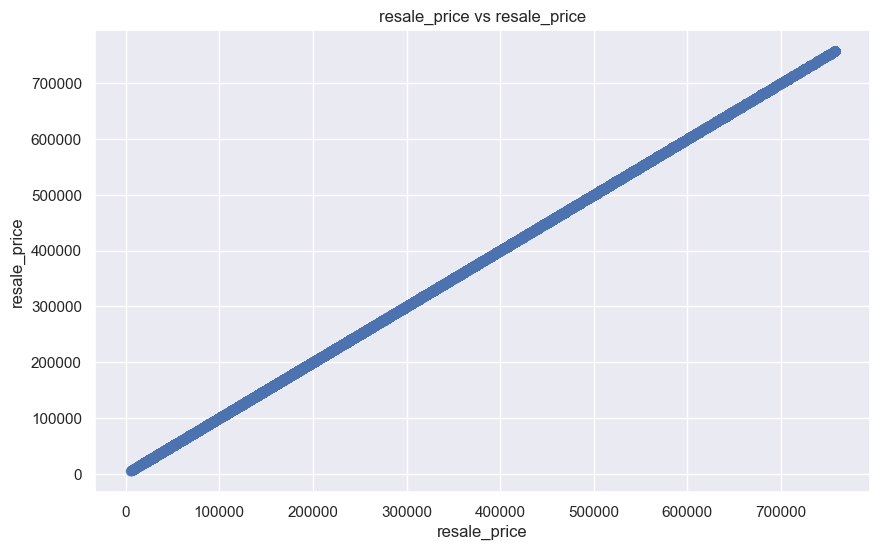

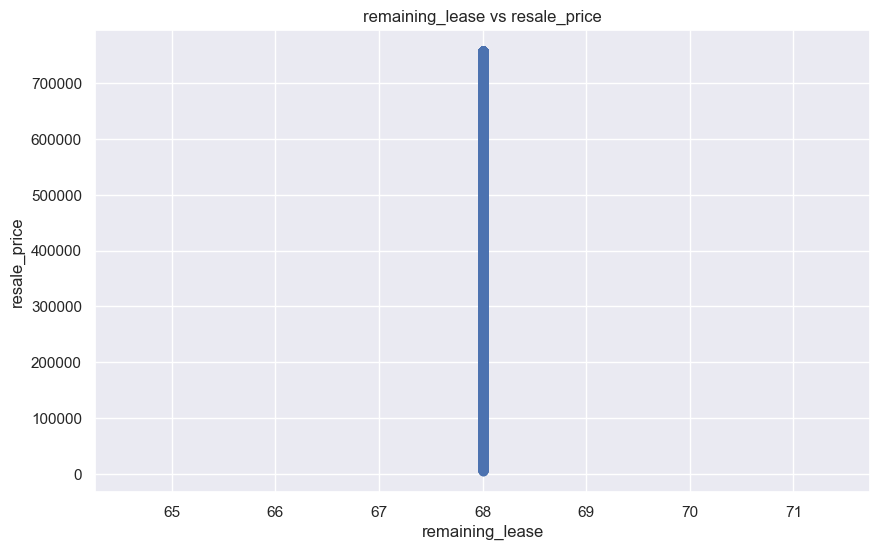

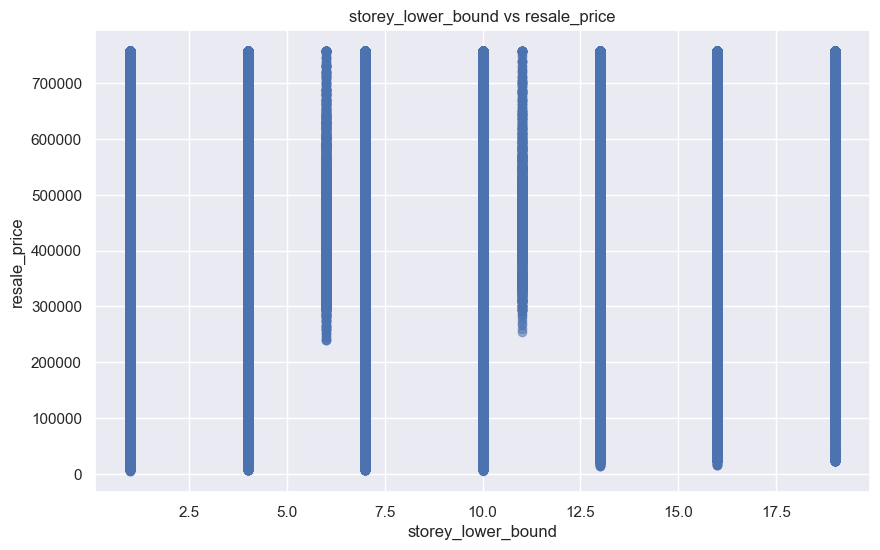

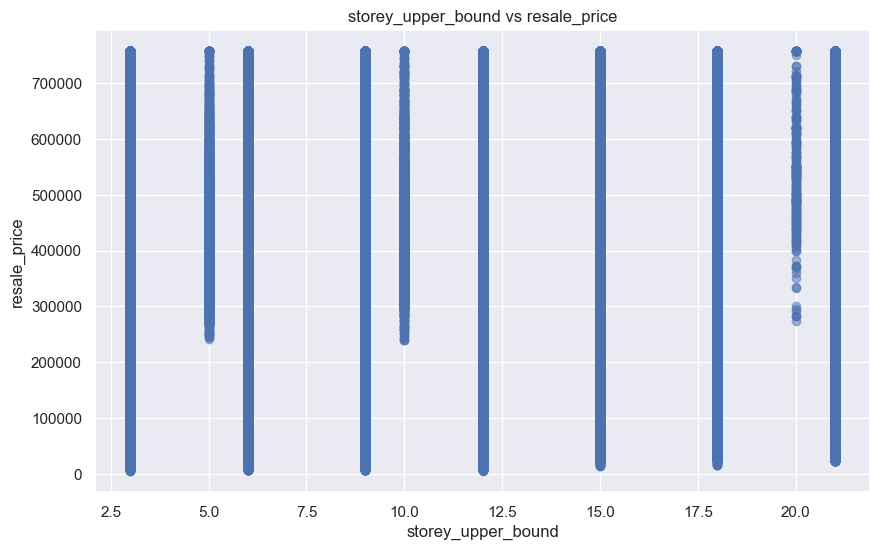

In [74]:
features = [ 'block',
 'floor_area_sqm',
 'lease_commence_date',
 'resale_price',
 'remaining_lease',
'storey_lower_bound', 
'storey_upper_bound']
target = 'resale_price'
for feature in features:
    plt.figure(figsize=(10, 6))
    plt.scatter(df[feature], df[target], alpha=0.5)
    plt.xlabel(feature)
    plt.ylabel(target)
    plt.title(f'{feature} vs {target}')
    plt.show()

Encoding Categorical Variables

In [75]:
#using encoding make a copy
df1=df.copy()

object_data_cols = [var for var in df.columns if df[var].dtype == 'object']
object_data_cols

['town', 'flat_type', 'street_name', 'flat_model']

In [76]:
from sklearn.preprocessing import LabelEncoder
# Initialize the Encoder
le= LabelEncoder()

In [77]:
# list unique street names
streets = df1['street_name'].unique()
# map the streets to povide input to ML model
streets_mapping = {street: idx + 1 for idx, street in enumerate(streets)}
streets_mapping

{'ANG MO KIO AVE 1': 1,
 'ANG MO KIO AVE 3': 2,
 'ANG MO KIO AVE 4': 3,
 'ANG MO KIO AVE 10': 4,
 'ANG MO KIO AVE 5': 5,
 'ANG MO KIO AVE 8': 6,
 'ANG MO KIO AVE 6': 7,
 'ANG MO KIO AVE 9': 8,
 'ANG MO KIO AVE 2': 9,
 'BEDOK RESERVOIR RD': 10,
 'BEDOK NTH ST 3': 11,
 'BEDOK STH RD': 12,
 'NEW UPP CHANGI RD': 13,
 'BEDOK NTH RD': 14,
 'BEDOK STH AVE 1': 15,
 'CHAI CHEE RD': 16,
 'CHAI CHEE DR': 17,
 'BEDOK NTH AVE 4': 18,
 'BEDOK STH AVE 3': 19,
 'BEDOK STH AVE 2': 20,
 'BEDOK NTH ST 2': 21,
 'BEDOK NTH ST 4': 22,
 'BEDOK NTH AVE 2': 23,
 'BEDOK NTH AVE 3': 24,
 'BEDOK NTH AVE 1': 25,
 'BEDOK NTH ST 1': 26,
 'CHAI CHEE ST': 27,
 'SIN MING RD': 28,
 'SHUNFU RD': 29,
 'BT BATOK ST 11': 30,
 'BT BATOK WEST AVE 8': 31,
 'BT BATOK WEST AVE 6': 32,
 'BT BATOK ST 21': 33,
 'BT BATOK EAST AVE 5': 34,
 'BT BATOK EAST AVE 4': 35,
 'HILLVIEW AVE': 36,
 'BT BATOK CTRL': 37,
 'BT BATOK ST 31': 38,
 'BT BATOK EAST AVE 3': 39,
 'TAMAN HO SWEE': 40,
 'TELOK BLANGAH CRES': 41,
 'BEO CRES': 42,
 'TELOK B

In [78]:
# alter the column with the mapped numbers
df1['street_name'] = df1['street_name'].map(streets_mapping)

# Display the DataFrame
df1.head(2)

,town,flat_type,block,street_name,floor_area_sqm,flat_model,lease_commence_date,resale_price,remaining_lease,resale_year,resale_month,storey_lower_bound,storey_upper_bound
0,ANG MO KIO,1 ROOM,309.0,1,31.0,Improved,1977.0,9000.0,68.0,1990,1,10,12
1,ANG MO KIO,1 ROOM,309.0,1,31.0,Improved,1977.0,6000.0,68.0,1990,1,4,6


In [79]:
df1['flat_type'].unique()

array(['1 ROOM', '3 ROOM', '4 ROOM', '5 ROOM', '2 ROOM', 'EXECUTIVE',
       'MULTI GENERATION'], dtype=object)

In [80]:
category_mapping = {
    '1 ROOM': 1,
    '2 ROOM': 2,
    '3 ROOM': 3,
    '4 ROOM': 4,
    '5 ROOM': 5,
    'EXECUTIVE': 6,
    'MULTI GENERATION': 7
}

# alter the column with the mapped numbers
df1['flat_type'] =df1['flat_type'].map(category_mapping)

# Display the DataFrame
df1.head(2)

,town,flat_type,block,street_name,floor_area_sqm,flat_model,lease_commence_date,resale_price,remaining_lease,resale_year,resale_month,storey_lower_bound,storey_upper_bound
0,ANG MO KIO,1,309.0,1,31.0,Improved,1977.0,9000.0,68.0,1990,1,10,12
1,ANG MO KIO,1,309.0,1,31.0,Improved,1977.0,6000.0,68.0,1990,1,4,6


In [81]:
# Create a mapping of 'flat_model' values to numbers
flat_model_mapping = {
    'IMPROVED': 1,
    'NEW GENERATION': 2,
    'MODEL A': 3,
    'STANDARD': 4,
    'SIMPLIFIED': 5,
    'MODEL A-MAISONETTE': 6,
    'APARTMENT': 7,
    'MAISONETTE': 8,
    'TERRACE': 9,
    '2-ROOM': 10,
    'IMPROVED-MAISONETTE': 11,
    'MULTI GENERATION': 12,
    'PREMIUM APARTMENT': 13,
    'Improved': 14,
    'New Generation': 15,
    'Model A': 16,
    'Standard': 17,
    'Apartment': 18,
    'Simplified': 19,
    'Model A-Maisonette': 20,
    'Maisonette': 21,
    'Multi Generation': 22,
    'Adjoined flat': 23,
    'Premium Apartment': 24,
    'Terrace': 25,
    'Improved-Maisonette': 26,
    'Premium Maisonette': 27,
    '2-room': 28,
    'Model A2': 29,
    'DBSS': 30,
    'Type S1': 31,
    'Type S2': 32,
    'Premium Apartment Loft': 33,
    '3Gen': 34
}

# Map 'flat_model' values to numbers
df1['flat_model'] =df1['flat_model'].map(flat_model_mapping)

# Display the DataFrame
df1.head(3)

,town,flat_type,block,street_name,floor_area_sqm,flat_model,lease_commence_date,resale_price,remaining_lease,resale_year,resale_month,storey_lower_bound,storey_upper_bound
0,ANG MO KIO,1,309.0,1,31.0,14,1977.0,9000.0,68.0,1990,1,10,12
1,ANG MO KIO,1,309.0,1,31.0,14,1977.0,6000.0,68.0,1990,1,4,6
2,ANG MO KIO,1,309.0,1,31.0,14,1977.0,8000.0,68.0,1990,1,10,12


In [82]:
# Create a mapping of 'town' values to numbers
town_mapping = {
    'ANG MO KIO': 1,
    'BEDOK': 2,
    'BISHAN': 3,
    'BUKIT BATOK': 4,
    'BUKIT MERAH': 5,
    'BUKIT TIMAH': 6,
    'CENTRAL AREA': 7,
    'CHOA CHU KANG': 8,
    'CLEMENTI': 9,
    'GEYLANG': 10,
    'HOUGANG': 11,
    'JURONG EAST': 12,
    'JURONG WEST': 13,
    'KALLANG/WHAMPOA': 14,
    'MARINE PARADE': 15,
    'QUEENSTOWN': 16,
    'SENGKANG': 17,
    'SERANGOON': 18,
    'TAMPINES': 19,
    'TOA PAYOH': 20,
    'WOODLANDS': 21,
    'YISHUN': 22,
    'LIM CHU KANG': 23,
    'SEMBAWANG': 24,
    'BUKIT PANJANG': 25,
    'PASIR RIS': 26,
    'PUNGGOL': 27
}

# Map 'town' values to numbers
df1['town'] = df1['town'].map(town_mapping)

# Display the DataFrame
df1.head(4)

,town,flat_type,block,street_name,floor_area_sqm,flat_model,lease_commence_date,resale_price,remaining_lease,resale_year,resale_month,storey_lower_bound,storey_upper_bound
0,1,1,309.0,1,31.0,14,1977.0,9000.0,68.0,1990,1,10,12
1,1,1,309.0,1,31.0,14,1977.0,6000.0,68.0,1990,1,4,6
2,1,1,309.0,1,31.0,14,1977.0,8000.0,68.0,1990,1,10,12
3,1,1,309.0,1,31.0,14,1977.0,6000.0,68.0,1990,1,7,9


In [83]:
# save the processed data for the deployment
df1.to_csv('final.csv')


Correlation

In [84]:
# correlation matrix (ranges from 1 to -1)
corrm=df1.corr()
#corrm.to_csv('corrm.csv')
corrm

,town,flat_type,block,street_name,floor_area_sqm,flat_model,lease_commence_date,resale_price,remaining_lease,resale_year,resale_month,storey_lower_bound,storey_upper_bound
town,1.000000,0.208023,0.049607,0.586753,0.200751,0.163934,0.332417,0.123316,NaN,0.123792,0.003995,-0.018954,-0.018695
flat_type,0.208023,1.000000,0.127813,0.385588,0.954846,0.241787,0.404991,0.596227,NaN,0.099981,0.003396,0.077132,0.077461
block,0.049607,0.127813,1.000000,0.044339,0.187937,-0.003949,-0.001141,-0.085559,NaN,-0.118554,0.002017,-0.125438,-0.125470
street_name,0.586753,0.385588,0.044339,1.000000,0.354312,0.354259,0.736539,0.379286,NaN,0.317520,0.006432,0.082372,0.082996
floor_area_sqm,0.200751,0.954846,0.187937,0.354312,1.000000,0.199770,0.382610,0.570387,NaN,0.061552,0.002801,0.043334,0.043522
flat_model,0.163934,0.241787,-0.003949,0.354259,0.199770,1.000000,0.354794,0.245524,NaN,0.162237,0.001674,0.020526,0.020877
lease_commence_date,0.332417,0.404991,-0.001141,0.736539,0.382610,0.354794,1.000000,0.545457,NaN,0.433075,0.003976,0.155505,0.155885
resale_price,0.123316,0.596227,-0.085559,0.379286,0.570387,0.245524,0.545457,1.000000,NaN,0.687475,0.006123,0.210607,0.213198
remaining_lease,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
resale_year,0.123792,0.099981,-0.118554,0.317520,0.061552,0.162237,0.433075,0.687475,NaN,1.000000,-0.024391,0.097326,0.099306


Heatmap

<Axes: >

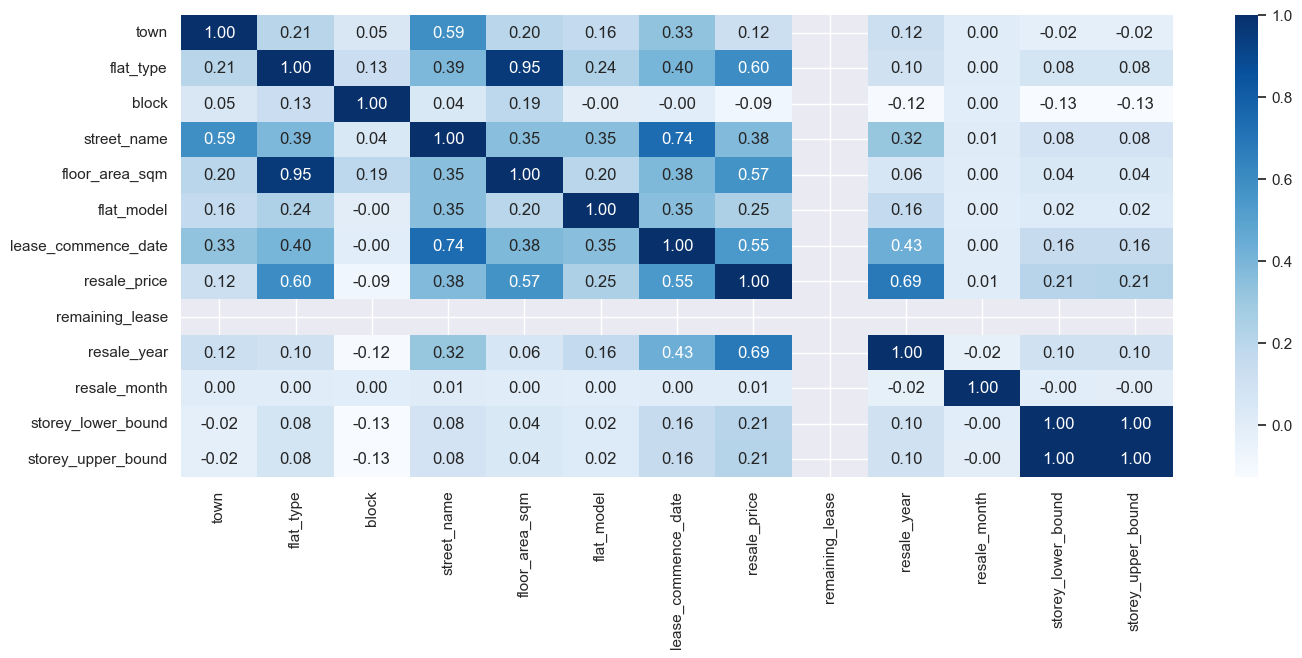

In [85]:
# visualize correlation matrix in Seaborn using a heatmap
plt.figure(figsize=(16,6))
sns.heatmap(corrm,annot=True,cmap="Blues",fmt=".2f")

RIGHT TO MEACHIN LEARNING


Split

In [86]:
# assign feature and target variable
X = df1.drop('resale_price', axis= 1)
y = df1['resale_price']
#splitting the data into training and testing sets with the ratio of 8:2
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=72)

In [87]:

print(X_train.shape,X_test.shape,y_train.shape,y_test.shape)

(744857, 12) (186215, 12) (744857,) (186215,)


Scalling

In [88]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)
X_train_scaled ,X_test_scaled

(array([[ 0.42856675, -0.01546338, -1.10568195, ..., -0.16275812,
         -0.58091046, -0.58426838],
        [-1.49426178,  1.03939605,  0.85073354, ...,  1.30595295,
          1.44028159,  1.43733393],
        [-1.23788464, -1.07032282,  0.11612617, ...,  0.42472631,
         -0.58091046, -0.58426838],
        ...,
        [ 1.45407529,  1.03939605, -0.1883743 , ..., -0.16275812,
          1.44028159,  1.43733393],
        [ 0.42856675, -0.01546338, -1.10568195, ...,  0.13098409,
         -0.58091046, -0.58426838],
        [-1.23788464, -0.01546338,  0.44727042, ...,  0.71846852,
         -0.58091046, -0.58426838]]),
 array([[-0.08418753, -0.01546338,  0.52720179, ..., -1.33772697,
          0.09282022,  0.08959905],
        [ 0.94132102,  1.03939605,  0.81267098, ...,  1.01221073,
         -1.25464114, -1.25813582],
        [ 0.42856675, -0.01546338, -1.10568195, ..., -1.33772697,
          1.44028159,  1.43733393],
        ...,
        [-1.62245034, -1.07032282,  0.64900198, ...,  

Model_Fit

In [92]:
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor

import xgboost as xgb
from xgboost import XGBRegressor  # Use XGBRegressor for regression

from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

Linear Regression

In [93]:
linear_model = LinearRegression(fit_intercept=True) #initialise
linear_model.fit(X_train,y_train) #fit - all magic
print(linear_model.predict(X_test))     #predict
print(y_test)

[284758.63868482 434439.97237852 492390.5205019  ... 109933.85438223
 473342.1334016  464696.86986796]
364755    188000.0
897810    450000.0
716410    520000.0
732444    700000.0
397018    281000.0
            ...   
801037    475000.0
235034    105000.0
53251      80000.0
865608    545000.0
700002    440000.0
Name: resale_price, Length: 186215, dtype: float64


In [94]:
linear_model.score(X_test, y_test)

0.7929403389217984

In [95]:
from sklearn.model_selection import cross_val_score
cross_val_linear_model=cross_val_score(linear_model,X_train,y_train,cv=10).mean()
cross_val_linear_model

np.float64(0.793930662665179)

K Nearest Neighbor Regression

In [96]:
# Create and train the K Nearest Neighbor Regression model
knn_regressor = KNeighborsRegressor(n_neighbors=5)  # You may need to adjust the number of neighbors
knn_regressor.fit(X_train_scaled, y_train)

# Make predictions on the test set using KNN model
y_pred_knn = knn_regressor.predict(X_test_scaled)

# Calculate Mean Absolute Error (MAE)
mae_knn = mean_absolute_error(y_test, y_pred_knn)

# Calculate Mean Squared Error (MSE)
mse_knn = mean_squared_error(y_test, y_pred_knn)

# Calculate Root Mean Squared Error (RMSE)
rmse_knn = np.sqrt(mse_knn)

# Calculate R-squared (R2) Score
r2_knn = r2_score(y_test, y_pred_knn)

print("Mean Absolute Error (MAE)    :", mae_knn)
print("Mean Squared Error (MSE)     :", mse_knn)
print("Root Mean Square Error (RMSE):", rmse_knn)
print("R-squared (R2) Score         :", r2_knn)

Mean Absolute Error (MAE)    : 29030.307132798105
Mean Squared Error (MSE)     : 1790086961.354379
Root Mean Square Error (RMSE): 42309.41929824113
R-squared (R2) Score         : 0.9336204589913246


Decision Tree Regression

In [97]:
# Create and train the Decision Tree Regressor model
dt_regressor = DecisionTreeRegressor(max_depth=20, random_state=11)
dt_regressor.fit(X_train, y_train)

# Make predictions on the test set using Decision Tree model
y_pred_dt = dt_regressor.predict(X_test)

# Calculate Mean Absolute Error (MAE)
mae_dt = mean_absolute_error(y_test, y_pred_dt)

# Calculate Mean Squared Error (MSE)
mse_dt = mean_squared_error(y_test, y_pred_dt)

# Calculate Root Mean Squared Error (RMSE)
rmse_dt = np.sqrt(mse_dt)

# Calculate R-squared (R2) Score
r2_dt = r2_score(y_test, y_pred_dt)

print("Mean Absolute Error (MAE)    :", mae_dt)
print("Mean Squared Error (MSE)     :", mse_dt)
print("Root Mean Square Error (RMSE):", rmse_dt)
print("R-squared (R2) Score         :", r2_dt)

Mean Absolute Error (MAE)    : 17659.849960637417
Mean Squared Error (MSE)     : 698160005.4034851
Root Mean Square Error (RMSE): 26422.717600645945
R-squared (R2) Score         : 0.9741110115263707


Random Forest Regression

In [118]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Create and train the Random Forest Regressor model
rf_regressor = RandomForestRegressor(random_state=42)
rf_regressor.fit(X_train, y_train)

# Make predictions on the test set
y_pred = rf_regressor.predict(X_test)

# Calculate Mean Absolute Error (MAE)
mae = mean_absolute_error(y_test, y_pred)

# Calculate Mean Squared Error (MSE)
mse = mean_squared_error(y_test, y_pred)

# Calculate Root Mean Squared Error (RMSE)
rmse = np.sqrt(mse)

# Calculate R-squared (R2) Score
rf_r2 = r2_score(y_test, y_pred)

print("Mean Absolute Error (MAE)    :", mae)
print("Mean Squared Error (MSE)     :", mse)
print("Root Mean Square Error (RMSE):", rmse)
print("R-squared (R2) Score         :", rf_r2)

Mean Absolute Error (MAE)    : 13965.354762010606
Mean Squared Error (MSE)     : 408248618.7467064
Root Mean Square Error (RMSE): 20205.163170504376
R-squared (R2) Score         : 0.9848614304696524


Xg Boost Regression

In [101]:
# Create and train an XGBoost regressor
xgregressor = XGBRegressor()
xgregressor.fit(X_train, y_train)

# Make predictions
y_pred = xgregressor.predict(X_test)

# Calculate Mean Absolute Error (MAE)
mae = mean_absolute_error(y_test, y_pred)

# Calculate Mean Squared Error (MSE)
mse = mean_squared_error(y_test, y_pred)

# Calculate Root Mean Squared Error (RMSE)
rmse = np.sqrt(mse)

# Calculate R-squared (R2) Score
xgb_r2 = r2_score(y_test, y_pred)

print("Mean Absolute Error (MAE)    :", mae)
print("Mean Squared Error (MSE)     :", mse)
print("Root Mean Square Error (RMSE):", rmse)
print("R-squared (R2) Score         :", xgb_r2)

Mean Absolute Error (MAE)    : 17055.538140026838
Mean Squared Error (MSE)     : 569770999.3179352
Root Mean Square Error (RMSE): 23869.876399301593
R-squared (R2) Score         : 0.9788718993929975


Finalizeing Models

In [123]:
import plotly.io as pio
pio.renderers.default = "browser"  # Open the plot in the default web browser


In [124]:
print(pio.renderers)


Renderers configuration
-----------------------
    Default renderer: 'browser'
    Available renderers:
        ['plotly_mimetype', 'jupyterlab', 'nteract', 'vscode',
         'notebook', 'notebook_connected', 'kaggle', 'azure', 'colab',
         'cocalc', 'databricks', 'json', 'png', 'jpeg', 'jpg', 'svg',
         'pdf', 'browser', 'firefox', 'chrome', 'chromium', 'iframe',
         'iframe_connected', 'sphinx_gallery', 'sphinx_gallery_png']



In [125]:
models = [ 'KNeighborsRegressor','DecisionTreeRegressor', 'RandomForestRegressor', 'XGBRegressor']
score = [r2_knn,r2_dt, rf_r2, xgb_r2]

fig=px.bar(x=models, y=score,title='R_2 of Regression Models')
fig.show()

print("FINDING BEST FIT MODEL FOR EVALUATION BASED ON R_2 SCORE\n")
max_score = max(score)  # Initialize max_score with the maximum value in the score list
max_model = ""

for model, score_value in zip(models, score):
    print(model, score_value)
    if score_value == max_score:
        max_model = model

print(f"\nModel: {max_model} contain Maximum R2_Score: {max_score} ")

FINDING BEST FIT MODEL FOR EVALUATION BASED ON R_2 SCORE

KNeighborsRegressor 0.85
DecisionTreeRegressor 0.78
RandomForestRegressor 0.9848614304696524
XGBRegressor 0.94

Model: RandomForestRegressor contain Maximum R2_Score: 0.9848614304696524 


Suggestion

In [126]:
rf_regressor.feature_importances_

array([0.04456864, 0.06267987, 0.01417253, 0.02322362, 0.26254099,
       0.00746465, 0.02746121, 0.        , 0.54181527, 0.00642131,
       0.00446488, 0.00518702])

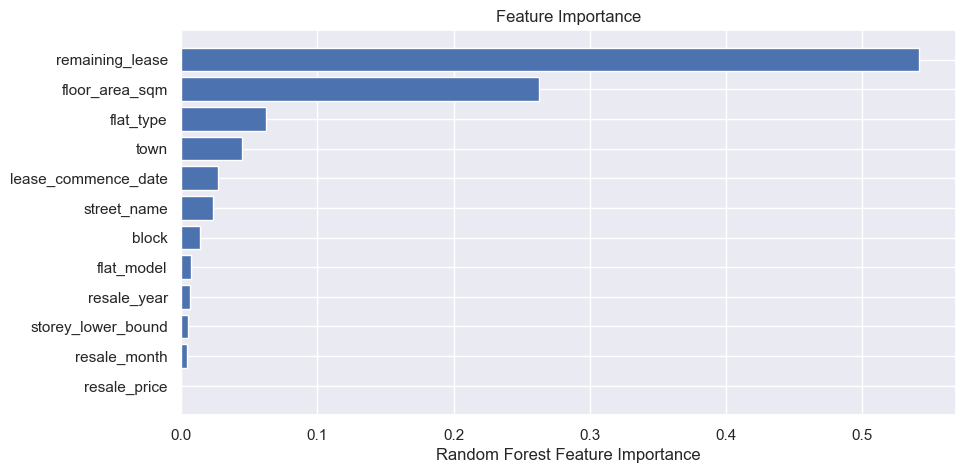

In [127]:
sorted_idx = rf_regressor.feature_importances_.argsort()
plt.figure(figsize=(10,5))
plt.barh(df.columns[sorted_idx], rf_regressor.feature_importances_[sorted_idx])
plt.xlabel("Random Forest Feature Importance")
plt.title("Feature Importance")

plt.show()

Save the model

In [128]:
model=rf_regressor.fit(X_train, y_train)

In [129]:
model

RandomForestRegressor(random_state=42)

In [130]:
import pickle


# save the model to disk
filename = 'RandomForestRegressor_model.pkl'
with open(filename, 'wb') as file:
    pickle.dump(model, file)

print(f"Saved {filename} model to disk")

Saved RandomForestRegressor_model.pkl model to disk


Predicting

In [131]:
# get sample to predict the resale price
pre_df =df1.sample(n=5)
pre_df
     

,town,flat_type,block,street_name,floor_area_sqm,flat_model,lease_commence_date,resale_price,remaining_lease,resale_year,resale_month,storey_lower_bound,storey_upper_bound
89216,19,3,407.0,194,60.0,14,1985.0,85000.0,68.0,1995,3,4,6
347890,8,4,307.0,372,106.0,16,1993.0,243000.0,68.0,2001,9,1,3
93597,5,3,107.0,44,70.0,14,1976.0,122000.0,68.0,1995,6,7,9
218980,22,3,140.0,219,68.0,15,1985.0,130000.0,68.0,1998,10,1,3
427590,21,5,503.0,452,124.0,14,1998.0,300000.0,68.0,2004,1,7,9


In [132]:
# drop the resale price column
A = pre_df.drop('resale_price', axis = 1)

Resale Price

In [133]:
# Make predictions on the sample
pre_pred = rf_regressor.predict(A)
pre_pred

array([ 93280.  , 239450.  , 123228.  , 132382.5 , 275447.76])